# Árboles de decisión

Es un algoritmo supervisado que produce una función de hipótesis $h(x)$ no lineal. Puede usarse tanto para regresión como para clasificación.

Dado un espacio de datos $\chi$ busca una partición del espacio en subconjuntos dijuntos $R_i$.

$$ \chi = \cup_{i=0}^{n} R_i, \hspace{5mm}R_i\cap R_j=\phi \hspace{3mm} i\ne j$$

Aprenden de una jerarquia if/else, lo que los lleva a una decisión. 

Supongamos que queremos distiguir entre Osos, halcones, delfines y pinguinos. La primera pregunta es el animal tiene plumas?, luego dependiendo de la respuesta aparecen dos nuevas preguntas ¿puede volar?, ¿tiene aletas?, con estás es posible hallar la respuesta, veamos: 

![Preview image](A1.png)

En el anterior cada pregunta recibe el nombre de nodo (también llamado hoja)


![](https://bookdown.org/content/2031/images/decision_tree_explanation.png)

Divide los datos en conjuntos homegéneos basados en la variable de entrada (característica) más significativa.

La construcción del árbol (selección de regiones) es recursivo y usa un método  Greedy para minimizar una función de pérdida. Analiza la mejor variable para dividir en el proceso de división actual, escoge:


*   Nodo hoja
*   Característica
*   Umbral

Dada una región $R_p$ se obtienen dos regiones 

$$R_1=\{x | x_j<t, x\in R_p\} \hspace{5mm} R_2=\{x | x_j\geq t, x \in R_p\} $$

Para determinar el nodo, $j$ y $t$ buscamos máximizar 

$$L(R_p)-\frac{|R_1|L(R_1)+|R_2|L(R_2)}{|R_1|+|R_2|}$$


*  **Indice de Gini (impureza de Gini):**

      $$L(R)=\sum_{i=1}^{k}p_i(1-p_i)$$
      donde $p_i$ es la proporción de casos que pertenecen a la clase $i$.
      
      No Garantiza mejoría. 
*    **Cross-entropy**

      $$L(R)=-\sum_{i=1}^{k}p_i\log(p_i)$$
      
*    **Cuadrático**

      $$L(R)=\sum (y-\hat{y})^2$$


**Ventajas**
* Fácil de entender.
* Util en exploración de datos:identificar importancia de variables a partir de cientos de variables.
* Menos limpieza de datos: outliers y valores faltantes no influencian mucho el modelo. 
* El tipo de datos no es una restricción.

**Desventajas**
* Sobreajuste.
* Pérdida de información al categorizar variables continuas
* Precisión, tasas de error altas. 
* Inestabilidad: un pequeño cambio en los datos puede modificar ampliamente la estructura del árbol. Por lo tanto la interpretación no es tan directa como parece.



# Métodos de Ensamble 

* **Bagging (Boostrap aggregation):**. Método de ensamble que reduce la varianza. Se hace un remuestreo (bootstrap) en el cual creamos $m$ subconjuntos de datos del conjunto original haciendo muestreo aleatorio con reemplazo. El tamaño de cada subconjunto es del mismo tamaño del conjunto original. Con cada uno de esos $m$ subconjuntos se entrena un modelo y a partir de los $m$ modelos se hace una predicción.

* **Boosting**: Método de ensamble que reduce varianza y sesgo. A las características se le modifica el peso relativo. Utiliza árboles de decisión debilies (una decisión antes de predecir) de forma secuencial, en cada paso se identifican datos mal clasificados y se aumenta el peso relativo, en el siguiente se entrena un árbol que clásifique bien estos datos. 
(No ayuda para el over-fitting)

![alt text](https://miro.medium.com/max/708/1*ZYbqZcnzL1CT3ug9wQgY0Q.png)

# Random Forest

Es un método que utiliza árboles de decisión ensamblados con Bagging.

* Para cada árbol se toma una muestra aleatoria con reemplazo de los datos. Esta muestra será el conjunto de entrenamiento para construir el árbol i.

* Para cada nodo se seleccionan  $m<M$ variables aleatoriamente. El valor m se mantiene constante durante la generación de todo el bosque.

* Cada árbol crece hasta su máximo. No hay proceso de poda.

* Clásificación por votación y regresión usando promedio. 

**Hyper-parametros**

* Número de árboles del bosque. 

* Número de variables aleatorias como candidatas en cada ramificación. 

* Número de muestras sobre las cuales entrenar.

* Mínimo número de muestras dentro de los nodos terminales.

* Máximo número de nodos terminales

# Implementación del método

Tomaremos la base de datos diabetes.csv y realizaremos la predicción de *Diabetic*

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

-------- Precisión----------
0.94
-------- Matriz de confusión--


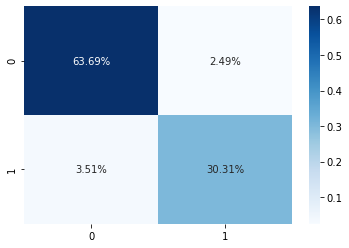

In [22]:
df = pd.read_csv('diabetes.csv')
X = df.drop(['PatientID', 'Diabetic'], axis=1)
y = df['Diabetic']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
# Entrenamos el modelo
modelo = RandomForestClassifier(n_estimators=100, max_depth=None)
modelo.fit(x_train, y_train)
y_p = modelo.predict(x_test)
print('-------- Precisión----------')
print(accuracy_score(y_test, y_p))
print('-------- Matriz de confusión--')
sns.heatmap(confusion_matrix(y_test, y_p)/np.sum(confusion_matrix(y_test, y_p)), annot=True, fmt='0.2%',  cmap='Blues')

In [20]:
# from sklearn.tree import export_graphviz
from sklearn import tree
# export_graphviz(modelo.estimators_[0], out_file="tree.dot", class_names=["No diabetico", "diabetico"],
#  feature_names=X.columns, impurity=False, filled=True)



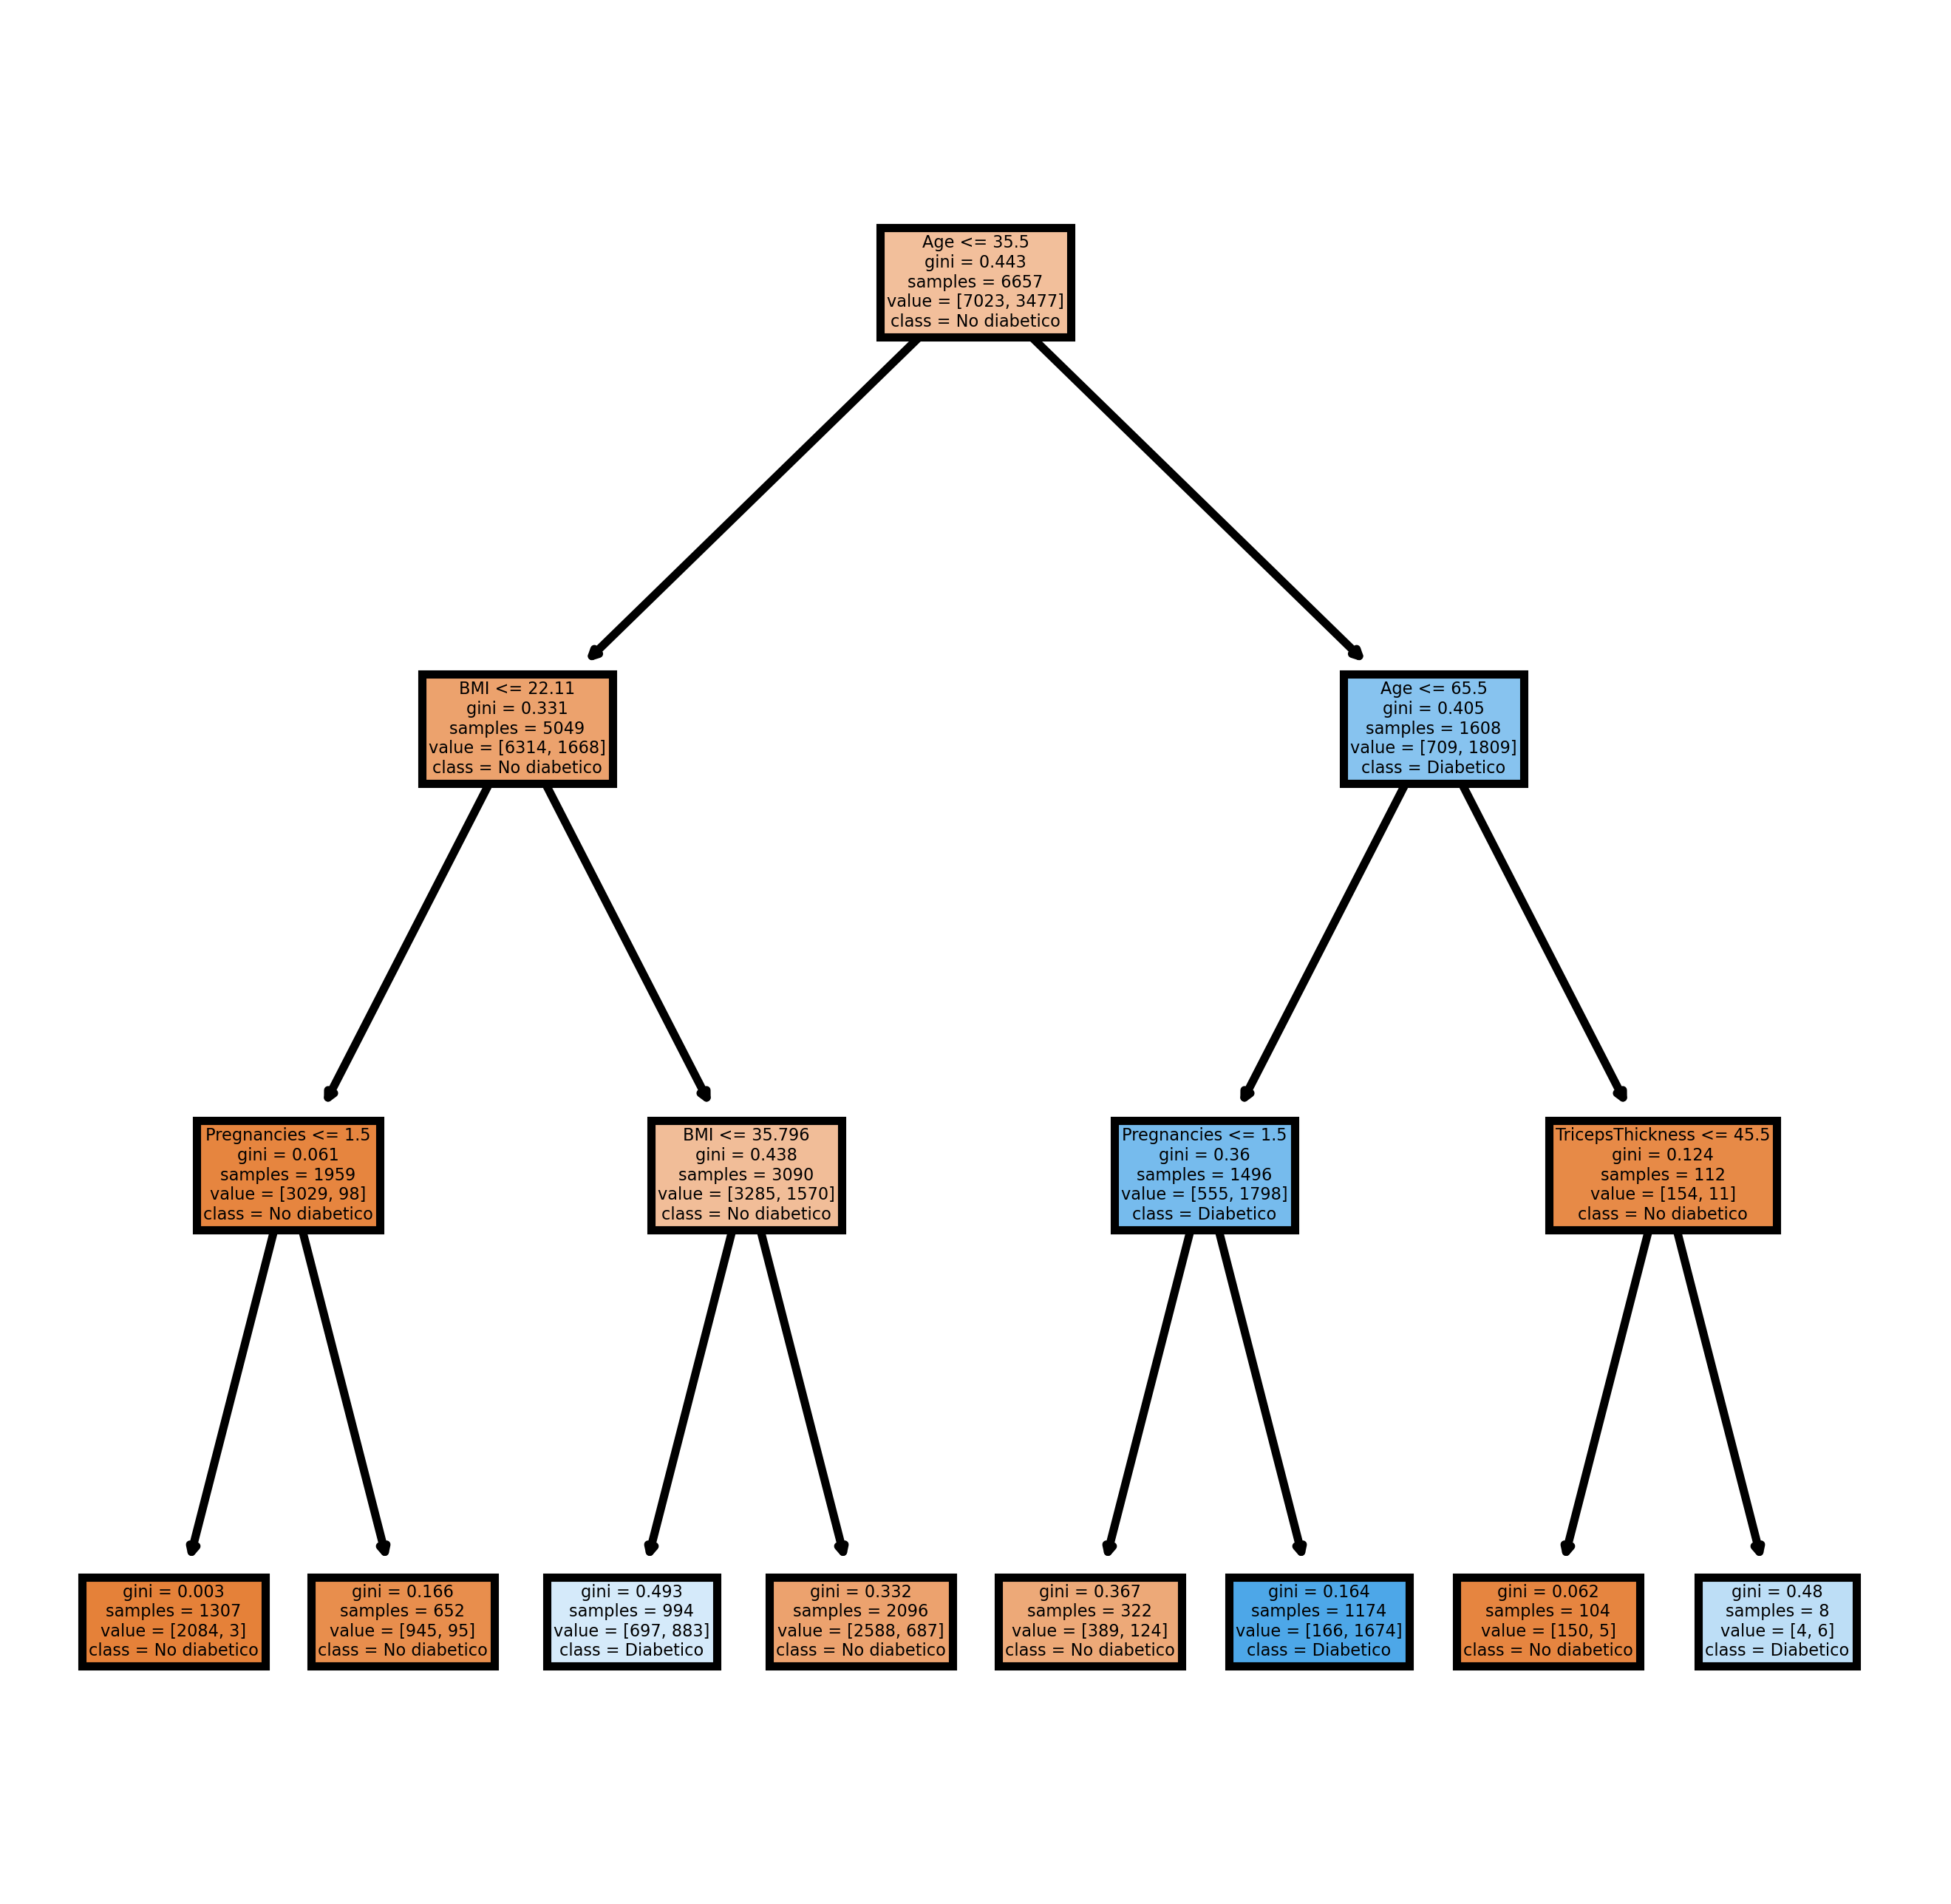

In [21]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(modelo.estimators_[0],
               feature_names = X.columns, 
               class_names=['No diabetico', 'Diabetico'],
               filled = True);
fig.savefig('rf_individualtree.png')
